## Лабораторная работа №3

ФИО: Жуковский Никита Евгеньевич  
Группа: БИВТ-22-СП-4

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`)
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задача многоклассовой классификации (объясню устно)

data = pd.read_csv("data.csv")

data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [328]:
data.shape

(219, 17)

## 2. Понимаем, какая перед нами задача

Задача бинарной классификации, так как ключевая переменная принимает значение 1 или 0

## 3. Делаем предобработку данных

In [329]:
print(data.isnull().sum())

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64


Столбец ReasonsForLack отбрасывается. Он не будет использоваться при обучении.

In [330]:
from sklearn.preprocessing import StandardScaler

#Копия для дата сета без столбца ReasonsForLack
data2 = data.drop('ReasonsForLack', axis=1)

selected_columns = ['Age', 'Perseverance', 'DesireToTakeInitiative', 'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth']

scaler = StandardScaler()
data2[selected_columns] = scaler.fit_transform(data2[selected_columns])

In [331]:
data2.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,Engineering Sciences,No,-0.585460,Male,Yes,No,-1.361182,-1.409774,-0.531472,-0.686308,-1.869914,-1.409655,-0.511621,Yes,Passion,1
1,Engineering Sciences,Yes,1.745735,Male,No,Yes,-0.354091,-0.540082,-0.531472,0.264967,0.089470,-0.514831,0.399314,Yes,Vision,0
2,Engineering Sciences,No,-1.362525,Male,Yes,No,-0.354091,0.329609,-0.531472,-0.686308,-0.890222,0.379994,0.399314,No,Passion,0
3,Engineering Sciences,Yes,0.191605,Male,Yes,Yes,-0.354091,-0.540082,-0.531472,-0.686308,0.089470,-0.514831,-0.511621,No,Resilience,0
4,Engineering Sciences,Yes,-0.585460,Male,Yes,Yes,-1.361182,-0.540082,-0.531472,-0.686308,0.089470,-0.514831,-1.422557,Yes,Vision,1


In [332]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
categorical_columns = ['EducationSector', 'IndividualProject',  'Gender', 'City', 'Influenced', 'MentalDisorder', 'MentalDisorder', 'KeyTraits']
for col in categorical_columns:
    data2[col] = label_encoder.fit_transform(data2[col])

data2.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,2,0,-0.585460,1,1,0,-1.361182,-1.409774,-0.531472,-0.686308,-1.869914,-1.409655,-0.511621,1,0,1
1,2,1,1.745735,1,0,1,-0.354091,-0.540082,-0.531472,0.264967,0.089470,-0.514831,0.399314,1,3,0
2,2,0,-1.362525,1,1,0,-0.354091,0.329609,-0.531472,-0.686308,-0.890222,0.379994,0.399314,0,0,0
3,2,1,0.191605,1,1,1,-0.354091,-0.540082,-0.531472,-0.686308,0.089470,-0.514831,-0.511621,0,2,0
4,2,1,-0.585460,1,1,1,-1.361182,-0.540082,-0.531472,-0.686308,0.089470,-0.514831,-1.422557,1,3,1


## 3. Обучение на тренировочном множестве

In [333]:
from sklearn.model_selection import train_test_split

X = data2.drop('y', axis=1)
y = data2['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X_train)

     EducationSector  IndividualProject       Age  Gender  City  Influenced  \
195                2                  0 -0.585460       1     1           1   
73                 2                  1  0.968670       0     1           0   
108                1                  1 -0.585460       1     1           1   
82                 1                  1 -0.585460       0     0           1   
137                2                  1 -0.585460       1     1           0   
..               ...                ...       ...     ...   ...         ...   
106                2                  1  0.191605       1     1           0   
14                 7                  0  0.191605       1     0           1   
92                 2                  1  1.745735       1     1           1   
179                2                  0 -1.362525       1     1           1   
102                7                  0 -0.585460       1     1           1   

     Perseverance  DesireToTakeInitiative  Competit

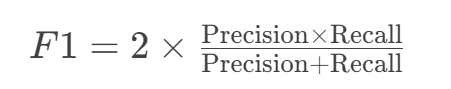

Линейная модель

In [334]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

print("Коэффициенты модели:", model_lr.coef_)
print("Свободный член (bias):", model_lr.intercept_)

Коэффициенты модели: [[ 0.02363697  0.41243215 -0.04186238  0.19345168  0.41562261  1.24502867
  -0.19664943  0.00349576 -0.26811462  0.38066313  0.04281759  0.01857911
   0.18893439 -0.04759864  0.01098346]]
Свободный член (bias): [-2.08182504]


Деревянная модель

In [335]:
from sklearn.tree import DecisionTreeClassifier


model_tree = DecisionTreeClassifier(max_depth=5)
model_tree.fit(X_train, y_train)

y_pred_dt = model_tree.predict(X_test)


K-ближайших соседей

In [336]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)


Случайный лес

In [337]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)


## 4. Считаю метрики на train и test множествах

Logistic Regression
Accuracy Train: 0.63, Accuracy Test: 0.58
ROC-AUC Train: 0.70, ROC-AUC Test: 0.64


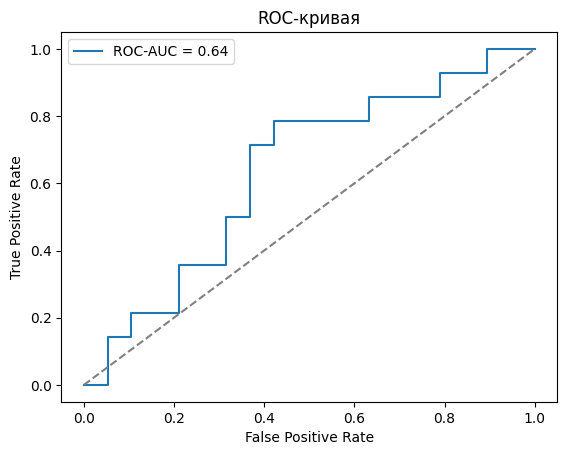

F1 Train: 0.53, F1 Test: 0.50


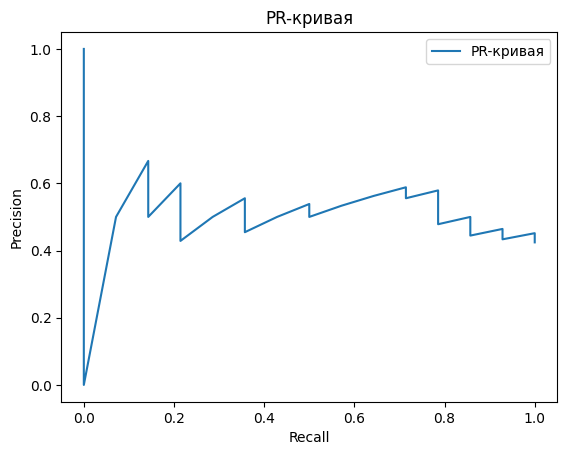

PR-AUC: 0.50
Decision Tree
Accuracy Train: 0.80, Accuracy Test: 0.55
ROC-AUC Train: 0.88, ROC-AUC Test: 0.56


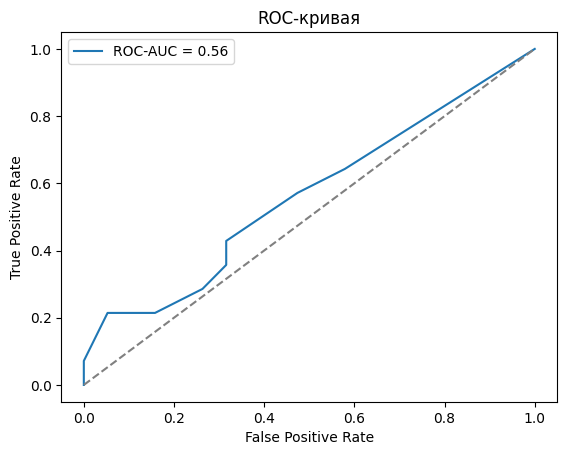

F1 Train: 0.76, F1 Test: 0.35


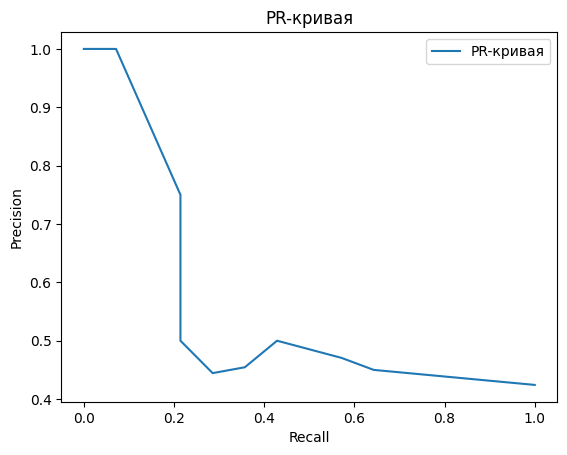

PR-AUC: 0.55
K-Nearest Neighbors
Accuracy Train: 0.72, Accuracy Test: 0.67
ROC-AUC Train: 0.74, ROC-AUC Test: 0.60


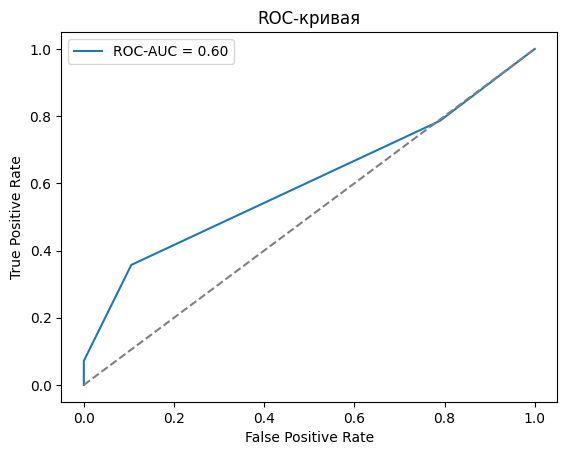

F1 Train: 0.57, F1 Test: 0.48


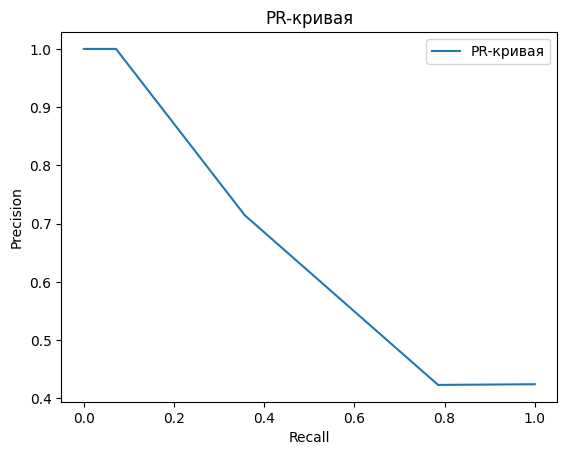

PR-AUC: 0.65
Random Forest
Accuracy Train: 0.85, Accuracy Test: 0.61
ROC-AUC Train: 0.96, ROC-AUC Test: 0.75


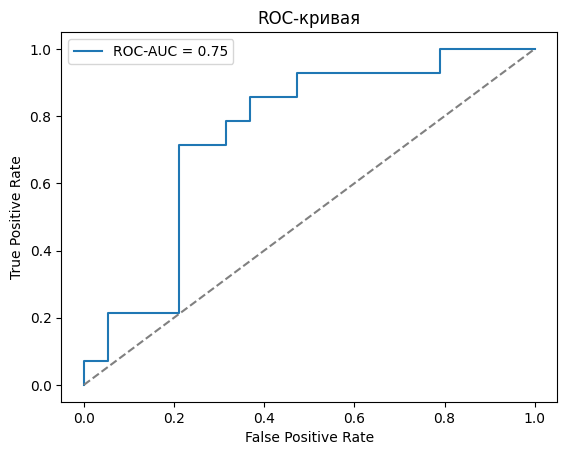

F1 Train: 0.80, F1 Test: 0.32


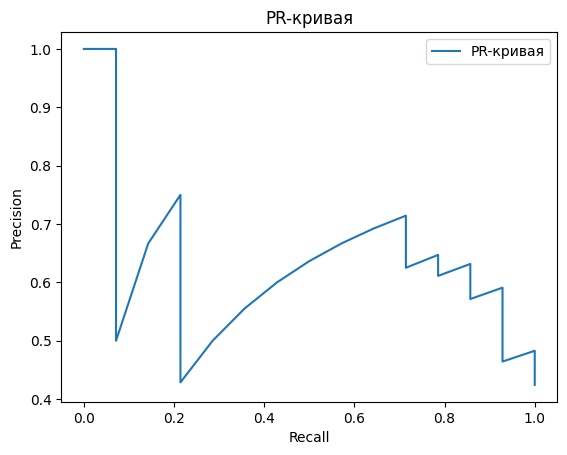

PR-AUC: 0.63


In [338]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, precision_recall_curve, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    f1_score,
    auc
)
import matplotlib.pyplot as plt

def evaluate_classification_model(model, X_train, X_test, y_train, y_test):

    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

     # Предсказания модели
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy Train: {accuracy_train:.2f}, Accuracy Test: {accuracy_test:.2f}")

    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC Train: {roc_auc_train:.2f}, ROC-AUC Test: {roc_auc_test:.2f}")

    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_test:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-кривая")
    plt.legend()
    plt.show()

    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    print(f"F1 Train: {f1_train:.2f}, F1 Test: {f1_test:.2f}")

    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(recall, precision, label="PR-кривая")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("PR-кривая")
    plt.legend()
    plt.show()

    pr_auc = auc(recall, precision)
    print(f"PR-AUC: {pr_auc:.2f}")

print("Logistic Regression")
evaluate_classification_model(model_lr, X_train, X_test, y_train, y_test)

print("Decision Tree")
evaluate_classification_model(model_tree, X_train, X_test, y_train, y_test)

print("K-Nearest Neighbors")
evaluate_classification_model(model_knn, X_train, X_test, y_train, y_test)

print("Random Forest")
evaluate_classification_model(model_rf, X_train, X_test, y_train, y_test)
